In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn')
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
df_boston = pd.read_csv('./datasets/boston_housing.csv')
df_boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0, 0.5, 'Number of Houses')

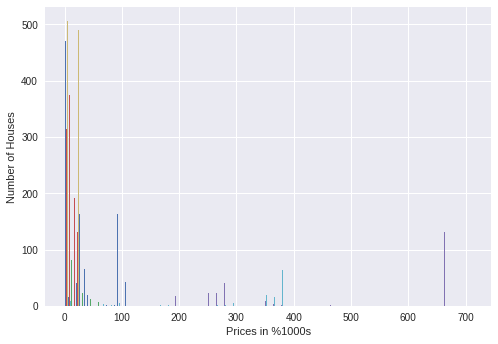

In [4]:
plt.hist(df_boston, bins=50)
plt.xlabel('Prices in %1000s')
plt.ylabel('Number of Houses')

[]

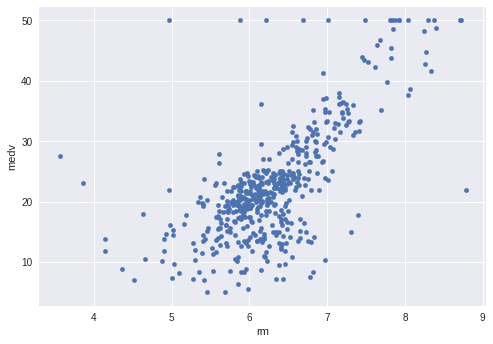

In [5]:
df_boston.plot.scatter(x='rm', y='medv')
plt.plot()

In [6]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

In [7]:
for col in df_boston.columns.values:
    df_boston[[('new_' + col)]]=mx.fit_transform(df_boston[[(col)]])
df_boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,...,new_nox,new_rm,new_age,new_dis,new_rad,new_tax,new_ptratio,new_b,new_lstat,new_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,...,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,...,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,...,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,...,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [8]:
df_boston[['new_rm','new_medv']]

,new_rm,new_medv
0,0.577505,0.422222
1,0.547998,0.368889
2,0.694386,0.660000
3,0.658555,0.631111
4,0.687105,0.693333
...,...,...
501,0.580954,0.386667
502,0.490324,0.346667
503,0.654340,0.420000
504,0.619467,0.377778


In [9]:
train_data, test_data = train_test_split(df_boston[['new_rm','new_medv']], test_size = 0.2, random_state=15)

In [10]:
print('Total rows:', train_data.shape[0])

Total rows: 404


In [11]:
train_label = train_data['new_medv']

In [12]:
train_feature = train_data.drop(["new_medv"], axis=1)

In [13]:
test_label = test_data['new_medv']

In [14]:
test_feature = test_data.drop(["new_medv"], axis=1)

In [15]:
lr_model = LinearRegression()

In [16]:
# training process for building AI
lr_model.fit(X=train_feature, y=train_label)

LinearRegression()

In [17]:
from sklearn.metrics import r2_score
accuracy_score = lr_model.score(test_feature, test_label)
print(f'Accuracy: {accuracy_score * 100:.2f}')

Accuracy: 53.58


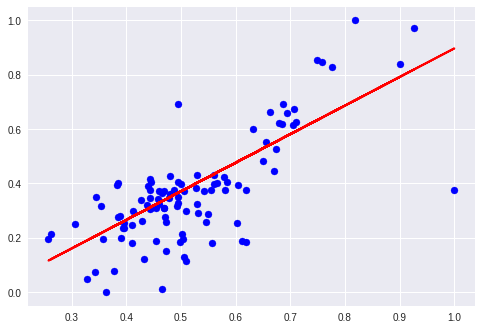

In [18]:
pred = lr_model.predict(test_feature) 
plt.scatter(test_data['new_rm'], test_data['new_medv'], color='blue')
plt.plot(test_data['new_rm'], pred, color='red', linewidth=2)